In [35]:
import face_recognition as fr
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
import glob
import numpy as np
import re
import pandas as pd



In [36]:
paths = ["data/CK+/","data/fer/train/"]
# data  = listdir(path)
ignore = ["morralla",".DS_Store","contempt"]
imgs = []
state = []

In [37]:
for path in paths:
    for item in listdir(path):
        if item not in ignore:
            imgs.extend([f"{path}{item}/{p}" for p in listdir(f"{path}{item}")])
            state.extend([item for p in listdir(f"{path}{item}")])

In [38]:
state[:5], imgs[:5]

(['surprise', 'surprise', 'surprise', 'surprise', 'surprise'],
 ['data/CK+/surprise/S052_001_00000015.png',
  'data/CK+/surprise/S050_002_00000018.png',
  'data/CK+/surprise/S086_001_00000019.png',
  'data/CK+/surprise/S037_001_00000020.png',
  'data/CK+/surprise/S034_001_00000029.png'])

In [39]:
imgs_ = []
for p in imgs:
    temp = Image.open(p)
    save = temp.copy()
    imgs_.append(save)
    temp.close()


In [40]:
imgs

['data/CK+/surprise/S052_001_00000015.png',
 'data/CK+/surprise/S050_002_00000018.png',
 'data/CK+/surprise/S086_001_00000019.png',
 'data/CK+/surprise/S037_001_00000020.png',
 'data/CK+/surprise/S034_001_00000029.png',
 'data/CK+/surprise/S135_001_00000039.png',
 'data/CK+/surprise/S133_009_00000006.png',
 'data/CK+/surprise/S089_001_00000016.png',
 'data/CK+/surprise/S044_001_00000024.png',
 'data/CK+/surprise/S075_002_00000014.png',
 'data/CK+/surprise/S073_001_00000013.png',
 'data/CK+/surprise/S058_001_00000020.png',
 'data/CK+/surprise/S063_001_00000013.png',
 'data/CK+/surprise/S131_001_00000016.png',
 'data/CK+/surprise/S124_001_00000014.png',
 'data/CK+/surprise/S092_001_00000017.png',
 'data/CK+/surprise/S097_001_00000021.png',
 'data/CK+/surprise/S076_001_00000017.png',
 'data/CK+/surprise/S080_001_00000018.png',
 'data/CK+/surprise/S113_001_00000012.png',
 'data/CK+/surprise/S010_002_00000014.png',
 'data/CK+/surprise/S115_001_00000008.png',
 'data/CK+/surprise/S100_002_000

In [41]:
imgs_array = []
HEIGHT, WIDTH =48,48
for f in imgs_:
    img = f.convert("L").resize((HEIGHT, WIDTH))
    imgs_array.append(np.array(img))

In [42]:
#imgs_array = [el/255 for el in imgs_array]


In [43]:
imgs_array = np.array(imgs_array)

In [44]:
imgs_array.shape


(29611, 48, 48)

In [45]:
imgs_flat = imgs_array.reshape(29611,48*48)/255


In [46]:
imgs_flat


array([[0.63137255, 0.9372549 , 0.01568627, ..., 0.17647059, 0.23137255,
        0.20392157],
       [0.60392157, 0.        , 0.        , ..., 0.8745098 , 0.85490196,
        0.67058824],
       [0.85882353, 0.9254902 , 0.        , ..., 0.18431373, 0.22745098,
        0.21568627],
       ...,
       [0.33333333, 0.34901961, 0.35294118, ..., 0.29019608, 0.29019608,
        0.26666667],
       [0.41176471, 0.25882353, 0.25490196, ..., 0.28627451, 0.19215686,
        0.06666667],
       [0.60784314, 0.36078431, 0.29019608, ..., 0.15686275, 0.16470588,
        0.17647059]])

In [47]:
categories = list(set(state))

In [48]:
categories = ['sadness', 'disgust', 'surprise', 'anger', 'fear', 'neutral', 'happiness']

In [49]:
from sklearn.preprocessing import  LabelEncoder

In [50]:
le = LabelEncoder()
le.fit(categories)

LabelEncoder()

In [51]:
le.classes_

array(['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness',
       'surprise'], dtype='<U9')

In [52]:
y= le.transform(state)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs_flat,y)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [70]:
models = {
    "KNN":KNeighborsClassifier(),
    "RF":RandomForestClassifier(),
}

In [71]:
for name,m in models.items():
    m.fit(X_train,y_train)

In [72]:
path = "data/predict/"
data_pred  = listdir(path)
ignore = ["morralla",".DS_Store"]
imgs_pred = []
state_pred = []

In [73]:
for item in data_pred:
    if item not in ignore:
        imgs_pred.extend([f"{path}{item}/{p}" for p in listdir(f"{path}{item}")])
        state_pred.extend([item for p in listdir(f"{path}{item}")])
imgs_pred = [Image.open(p) for p in imgs_pred]
imgs_array_pred = []
for f in imgs_pred:
    img = f.convert("L").resize((HEIGHT, WIDTH))
    imgs_array_pred.append(np.array(img))
imgs_array_pred = np.array(imgs_array_pred)

In [74]:
state_pred = le.transform(state_pred)

In [75]:
len(state_pred)

34

In [76]:
imgs_pred_flat = imgs_array_pred.reshape(34,48*48)/255


In [77]:
y_pred = {}
for name, m in models.items():
    y_pred[name] = m.predict(imgs_pred_flat)

In [78]:
from sklearn.metrics import accuracy_score
metrics = {name:accuracy_score(state_pred,pred) for name,pred in y_pred.items()}

In [79]:
metrics

{'KNN': 0.14705882352941177, 'RF': 0.2647058823529412}

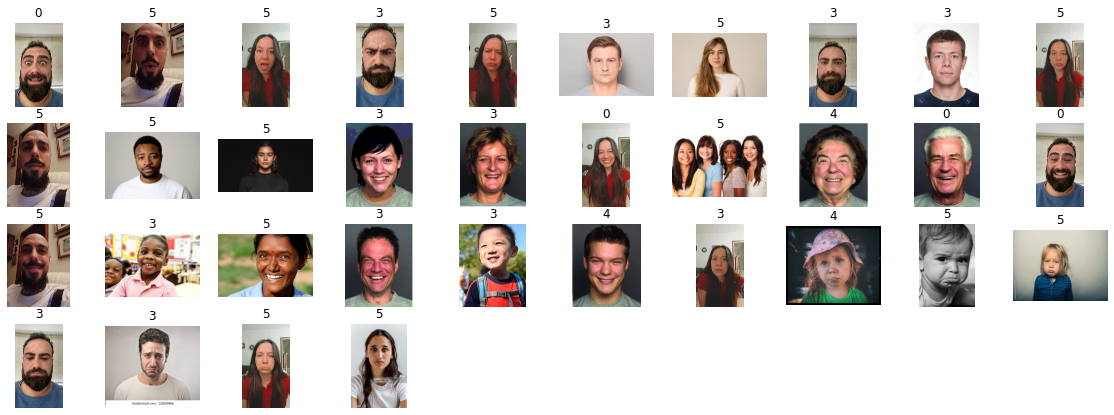

In [69]:
plt.figure(figsize=(20,20))
for i in range(len(imgs_pred)):
    plt.subplot(11,10,i+1)
    plt.imshow(imgs_pred[i])
    plt.title(y_pred["RF"][i])
    plt.axis("off")

In [33]:
prediction.argmax(axis = -1)


NameError: name 'prediction' is not defined

In [129]:
cats= y_dummies.columns
cats = [x.replace("0_","") for x in cats]

In [130]:
cats

['anger',
 'contempt',
 'disgust',
 'fear',
 'happiness',
 'neutral',
 'sadness',
 'surprise']

In [34]:
states_model = []
for i in range(len(prediction)):
    states_model.append(cats[prediction[i].argmax()])
    print(state_pred[i],cats[prediction[i].argmax()])

NameError: name 'prediction' is not defined

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
accuracy_score(state_pred,states_model)

0.3